In [37]:
import my_google_calendar
from datetime import datetime

#Get calendar by date range
date_min = datetime(2014, 1, 1).isoformat() + 'Z' # 'Z' indicates UTC time
date_max = datetime.utcnow().isoformat() + 'Z' # 'Z' indicates UTC time
my_calendar = my_google_calendar.GoogleCalendar("primary",date_min,date_max)
events = my_calendar.events_df
meeting_counts_by_date = events.groupby("start_date")["start_date"].count()
#count weekly sums
smooth_meeting_counts_by_date = meeting_counts_by_date.rolling(window=7).sum()

loading events into dataframe
100 events processed
200 events processed
300 events processed
400 events processed
500 events processed
600 events processed
700 events processed
800 events processed
900 events processed
1000 events processed
1100 events processed
1200 events processed
1300 events processed
1400 events processed
1500 events processed
1600 events processed
1700 events processed
1800 events processed


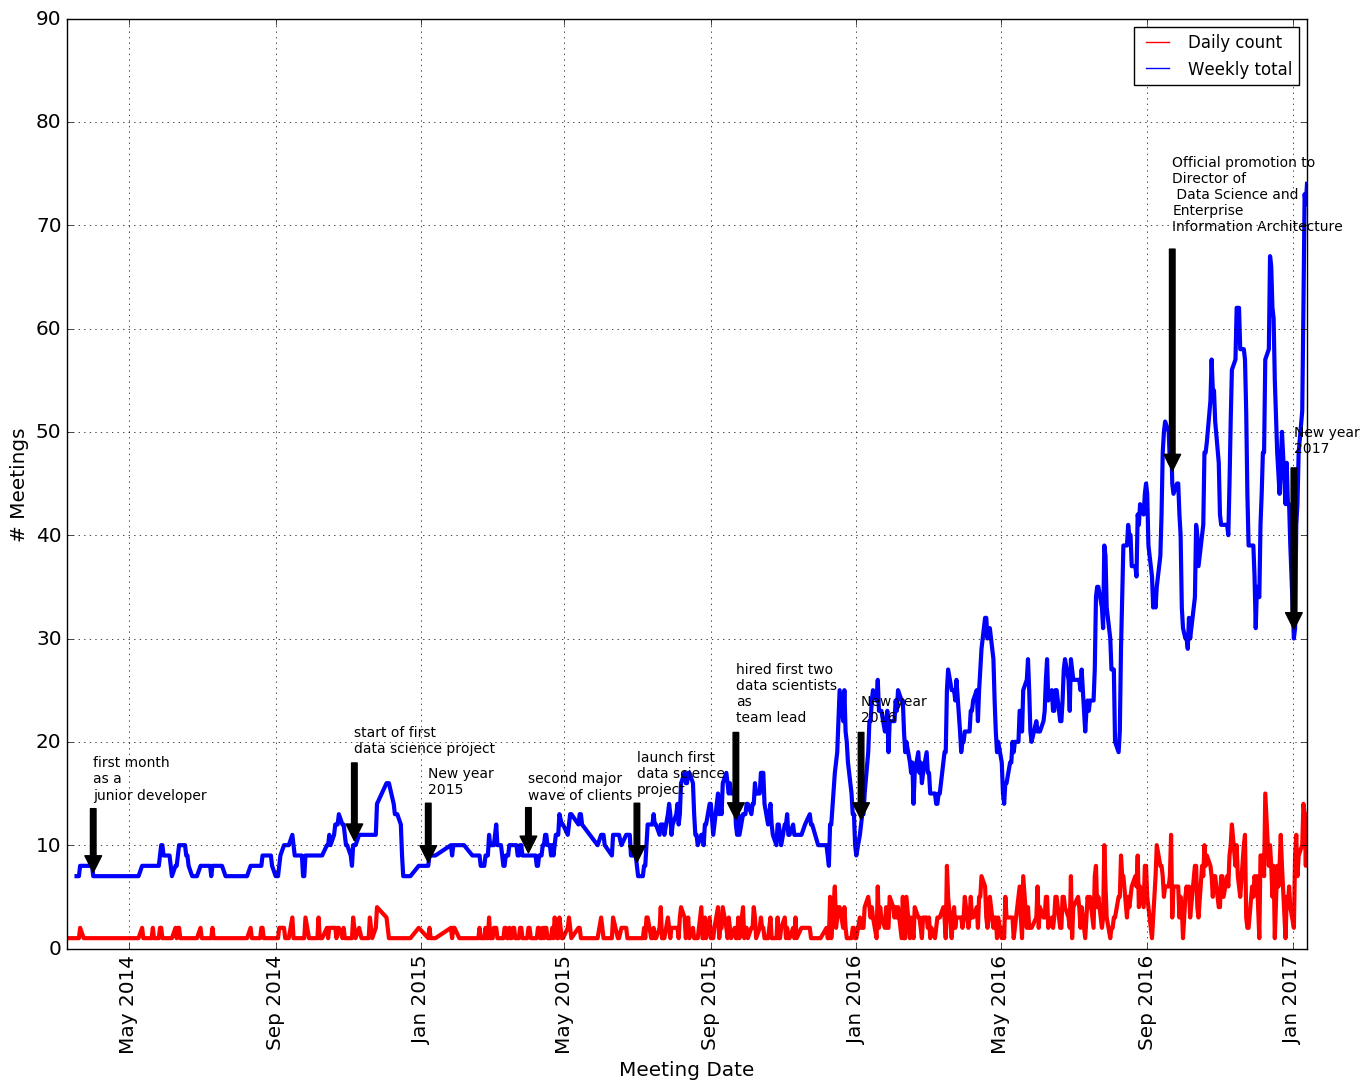

In [63]:
import random
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas

# default plot params
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'axes.facecolor': 'white'}
plt.rcParams.update(params)

def plot_meeting_counts(raw_counts, raw_counts_color, smooth_counts, smooth_counts_color):
    color_look_up = {
        "red": "r",
        "blue": "b",
        "black": "k"
    }
    raw_counts.plot(
        rot=90,
        color=color_look_up[raw_counts_color],
        linewidth=3.0
    )
    smooth_counts.plot(
        rot=90,
        color=color_look_up[smooth_counts_color],
        linewidth=3.0
    )
    #legend setting workaround 
    raw_counts_line = mlines.Line2D([], [], color=raw_counts_color, label='Daily count')
    smooth_counts_line = mlines.Line2D([], [], color=smooth_counts_color, label='Weekly total')

    plt.legend(handles=[raw_counts_line, smooth_counts_line])
    plt.xlabel('Meeting Date')
    plt.ylabel('# Meetings')
    plt.grid(True)
    fig = plt.gcf()
    fig.set_size_inches(16, 12)

def label_significant_events(significant_events, counts):
    significant_events["event_date"] = significant_events["event_date"].dt.date
    axes = plt.gca()
    for index, row in significant_events.iterrows():
        #to help avoid collision of labels 
        random_shift = random.randint(1,4)
        axes.annotate(row["event_name"], xy=(row["event_date"], counts[row["event_date"]] ), xytext=(row["event_date"], 1.5*counts[row["event_date"]]+random_shift),
                                  arrowprops=dict(facecolor='black', shrink=0.05)
                                  )

meeting_count_plot = plot_meeting_counts(
        meeting_counts_by_date,
        'red',
        smooth_meeting_counts_by_date,
        'blue'
    )

#define significant events to label on graph, currently can only use dates of events from calendar
significant_events = pandas.DataFrame(
        [
        ["first month\nas a\njunior developer", datetime(2014, 4, 1 )],
        ["start of first \ndata science project", datetime(2014, 11, 6 )],
        ["second major\nwave of clients", datetime(2015, 4, 1 )],
        ["launch first\ndata science\nproject", datetime(2015, 7, 1 )],
        ["New year\n2016", datetime(2016, 1, 5 )],
        ["hired first two\ndata scientists\nas\nteam lead", datetime(2015, 9, 22 )],
        ["Official promotion to\nDirector of\n Data Science and\nEnterprise\nInformation Architecture", datetime(2016, 9, 22 )],
        ["New year\n2015", datetime(2015, 1, 7 )],
        ["New year\n2017", datetime(2017, 1, 2 )],
         ],
    columns=["event_name", "event_date"]
)
label_significant_events(significant_events, smooth_meeting_counts_by_date )
axes = plt.gca()
axes.set_ylim([0,90])
plt.savefig("./my_meeting_stats.jpg")
plt.show()
